# Regex
## Task 8
### Name-Sanjay Dey
### Registration id - SIRSS2204






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")

In [3]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(f"The shape of given data is {dataset.shape}")
print(f'The different column label:  {list(dataset.columns)}')
print(f"The Sample Data coinsist of people of age between {dataset['age'].min()} to {dataset['age'].max()}")

The shape of given data is (303, 14)
The different column label:  ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
The Sample Data coinsist of people of age between 29 to 77


In [5]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
print("The categorial cols are : ", ['sex','exng','caa','cp','fbs','restecg','slp','thall', 'output'])
print("The non categorial cols are : ", ["age","trtbps","chol","thalachh","oldpeak"])

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall', 'output']
The non categorial cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


In [7]:
dataset.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [9]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=4,
    subplot_titles=("Blood sugar", "Included engina","Sex", "Electrocardiographic results", "Slope", "Target", "Chest pain type", "Number of major vessels"),
    specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}, {"type": "domain"}, {"type": "domain"}]]
)
fig.add_trace(
    go.Pie(labels=['True', 'False'], values=[(dataset['fbs'] == 1).sum(), (dataset['fbs'] == 0).sum()]),
    row=1, col=1
)
fig.add_trace(
    go.Pie(labels=['Yes', 'No'], values=[(dataset['exng'] == 1).sum(), (dataset['exng'] == 0).sum()]),
    row=1, col=2
)
fig.add_trace(
    go.Pie(labels=['T-T wave normality', 'Normal', 'Left ventricular hypertrophy'], values=[(dataset['restecg'] == 1).sum(), (dataset['restecg'] == 0).sum(), (dataset['restecg'] == 2).sum()]),
    row=1, col=4
)
fig.add_trace(
    go.Pie(labels=['Male', 'Female'], values=[(dataset['sex'] == 1).sum(), (dataset['sex'] == 0).sum()]),
    row=1, col=3
)
fig.add_trace(
    go.Pie(labels=['Atypical Angina', 'Typical Angina', 'Non-anginal Pain', 'Asymptomatic'], values=[(dataset['cp'] == 1).sum(), (dataset['cp'] == 0).sum(), (dataset['cp'] == 2).sum(), (dataset['cp'] == 3).sum()]),
    row=2, col=3
)
fig.add_trace(
    go.Pie(labels=['Yes', 'No'], values=[(dataset['slp'] == 1).sum(), (dataset['slp'] == 0).sum()]),
    row=2, col=1
)
fig.add_trace(
    go.Pie(labels=['Have diseases', 'Does not have diseases'], values=[(dataset['output'] == 1).sum(), (dataset['output'] == 0).sum()]),
    row=2, col=2
)
fig.add_trace(
    go.Pie(labels=['1', '0', '2', '3', '4'], values=[(dataset['caa'] == 1).sum(), (dataset['output'] == 0).sum(), (dataset['caa'] == 2).sum(), (dataset['caa'] == 3).sum(), (dataset['caa'] == 4).sum()]),
    row=2, col=4
)

fig.update_layout(height=800, width=1100, title_text="Distribuation of Categorial Values", showlegend=False)
fig.show()

In [10]:
fig = make_subplots(
    rows=2, cols=2,
)
fig.add_trace(go.Histogram(x=dataset.age, name='Age of the patient'),
              row=1, col=1)
fig.add_trace(go.Histogram(x=dataset.trtbps, name='Resting blood pressure'),
              row=1, col=2)
fig.add_trace(go.Histogram(x=dataset.chol, name=' Cholestoral'),
              row=2, col=1)
fig.add_trace(go.Histogram(x=dataset.thalachh, name='Maximum heart rate'),
              row=2, col=2)

fig.update_xaxes(title_text="age", row=1, col=1)
fig.update_xaxes(title_text="trtbps", row=1, col=2)
fig.update_xaxes(title_text="chol", row=2, col=1)
fig.update_xaxes(title_text="thalachh", row=2, col=2)

fig.update_yaxes(title_text="count", row=1, col=1)
fig.update_yaxes(title_text="count", row=1, col=2)
fig.update_yaxes(title_text="count", row=2, col=1)
fig.update_yaxes(title_text="count", row=2, col=2)

fig.update_layout(title_text="Distribution of Continuous features", showlegend=False)

fig.show()

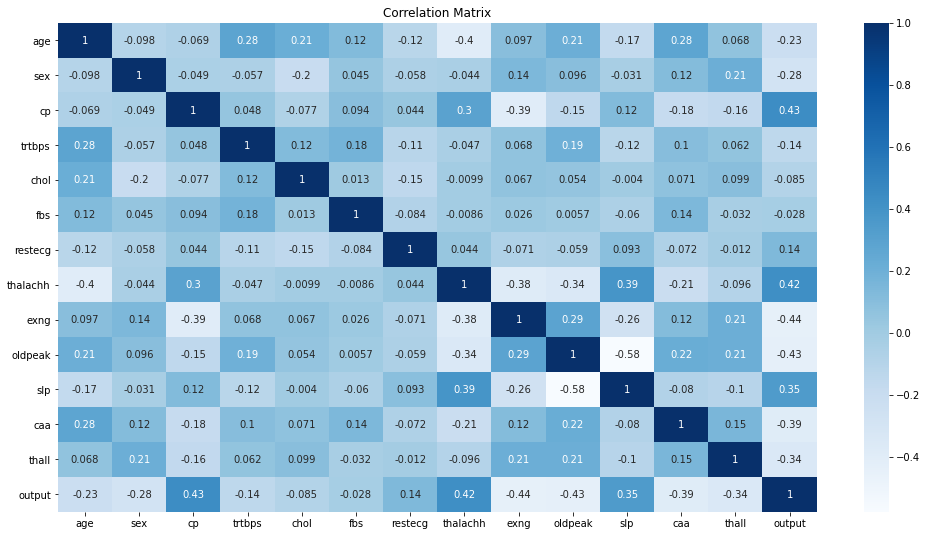

In [11]:
import matplotlib.pyplot as plt
from seaborn.matrix import heatmap
plt.figure(figsize=(17,9))
heatmap(dataset.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix');

In [12]:
fig = make_subplots(
    rows=2, cols=4,
)
fig.add_trace(go.Bar(x=dataset.cp,y=dataset.output, name='Chest pain'),
              row=1, col=1)
fig.add_trace(go.Bar(x=dataset.sex,y=dataset.output, name='Sex of the patient'),
              row=1, col=2)
fig.add_trace(go.Bar(x=dataset.exng,y=dataset.output, name='Exercise induced angina'),
              row=1, col=3)
fig.add_trace(go.Bar(x=dataset.fbs,y=dataset.output, name='fasting blood sugar'),
              row=1, col=4)
fig.add_trace(go.Bar(x=dataset.caa,y=dataset.output, name='Number of major vessels'),
              row=2, col=1)
fig.add_trace(go.Bar(x=dataset.slp,y=dataset.output, name='Slope'),
              row=2, col=2)
fig.add_trace(go.Bar(x=dataset.restecg,y=dataset.output, name='Resting electrocardiographic'),
              row=2, col=3)
fig.add_trace(go.Bar(x=dataset.thall,y=dataset.output, name='Thalium Stress Test result'),
              row=2, col=4)
fig.update_layout(height=800, width=1100, title_text="Distribution of categorical features according to target variable", showlegend=False)

fig.update_xaxes(title_text="cp", row=1, col=1)
fig.update_xaxes(title_text="sex", row=1, col=2)
fig.update_xaxes(title_text="exng", row=1, col=3)
fig.update_xaxes(title_text="fbs", row=1, col=4)
fig.update_xaxes(title_text="caa", row=2, col=1)
fig.update_xaxes(title_text="slp", row=2, col=2)
fig.update_xaxes(title_text="restecg", row=2, col=3)
fig.update_xaxes(title_text="thall", row=2, col=4)

fig.update_yaxes(title_text="Number of Target patient", row=1, col=1)
fig.update_yaxes(title_text="Number of Target patient", row=2, col=1)


fig.show()

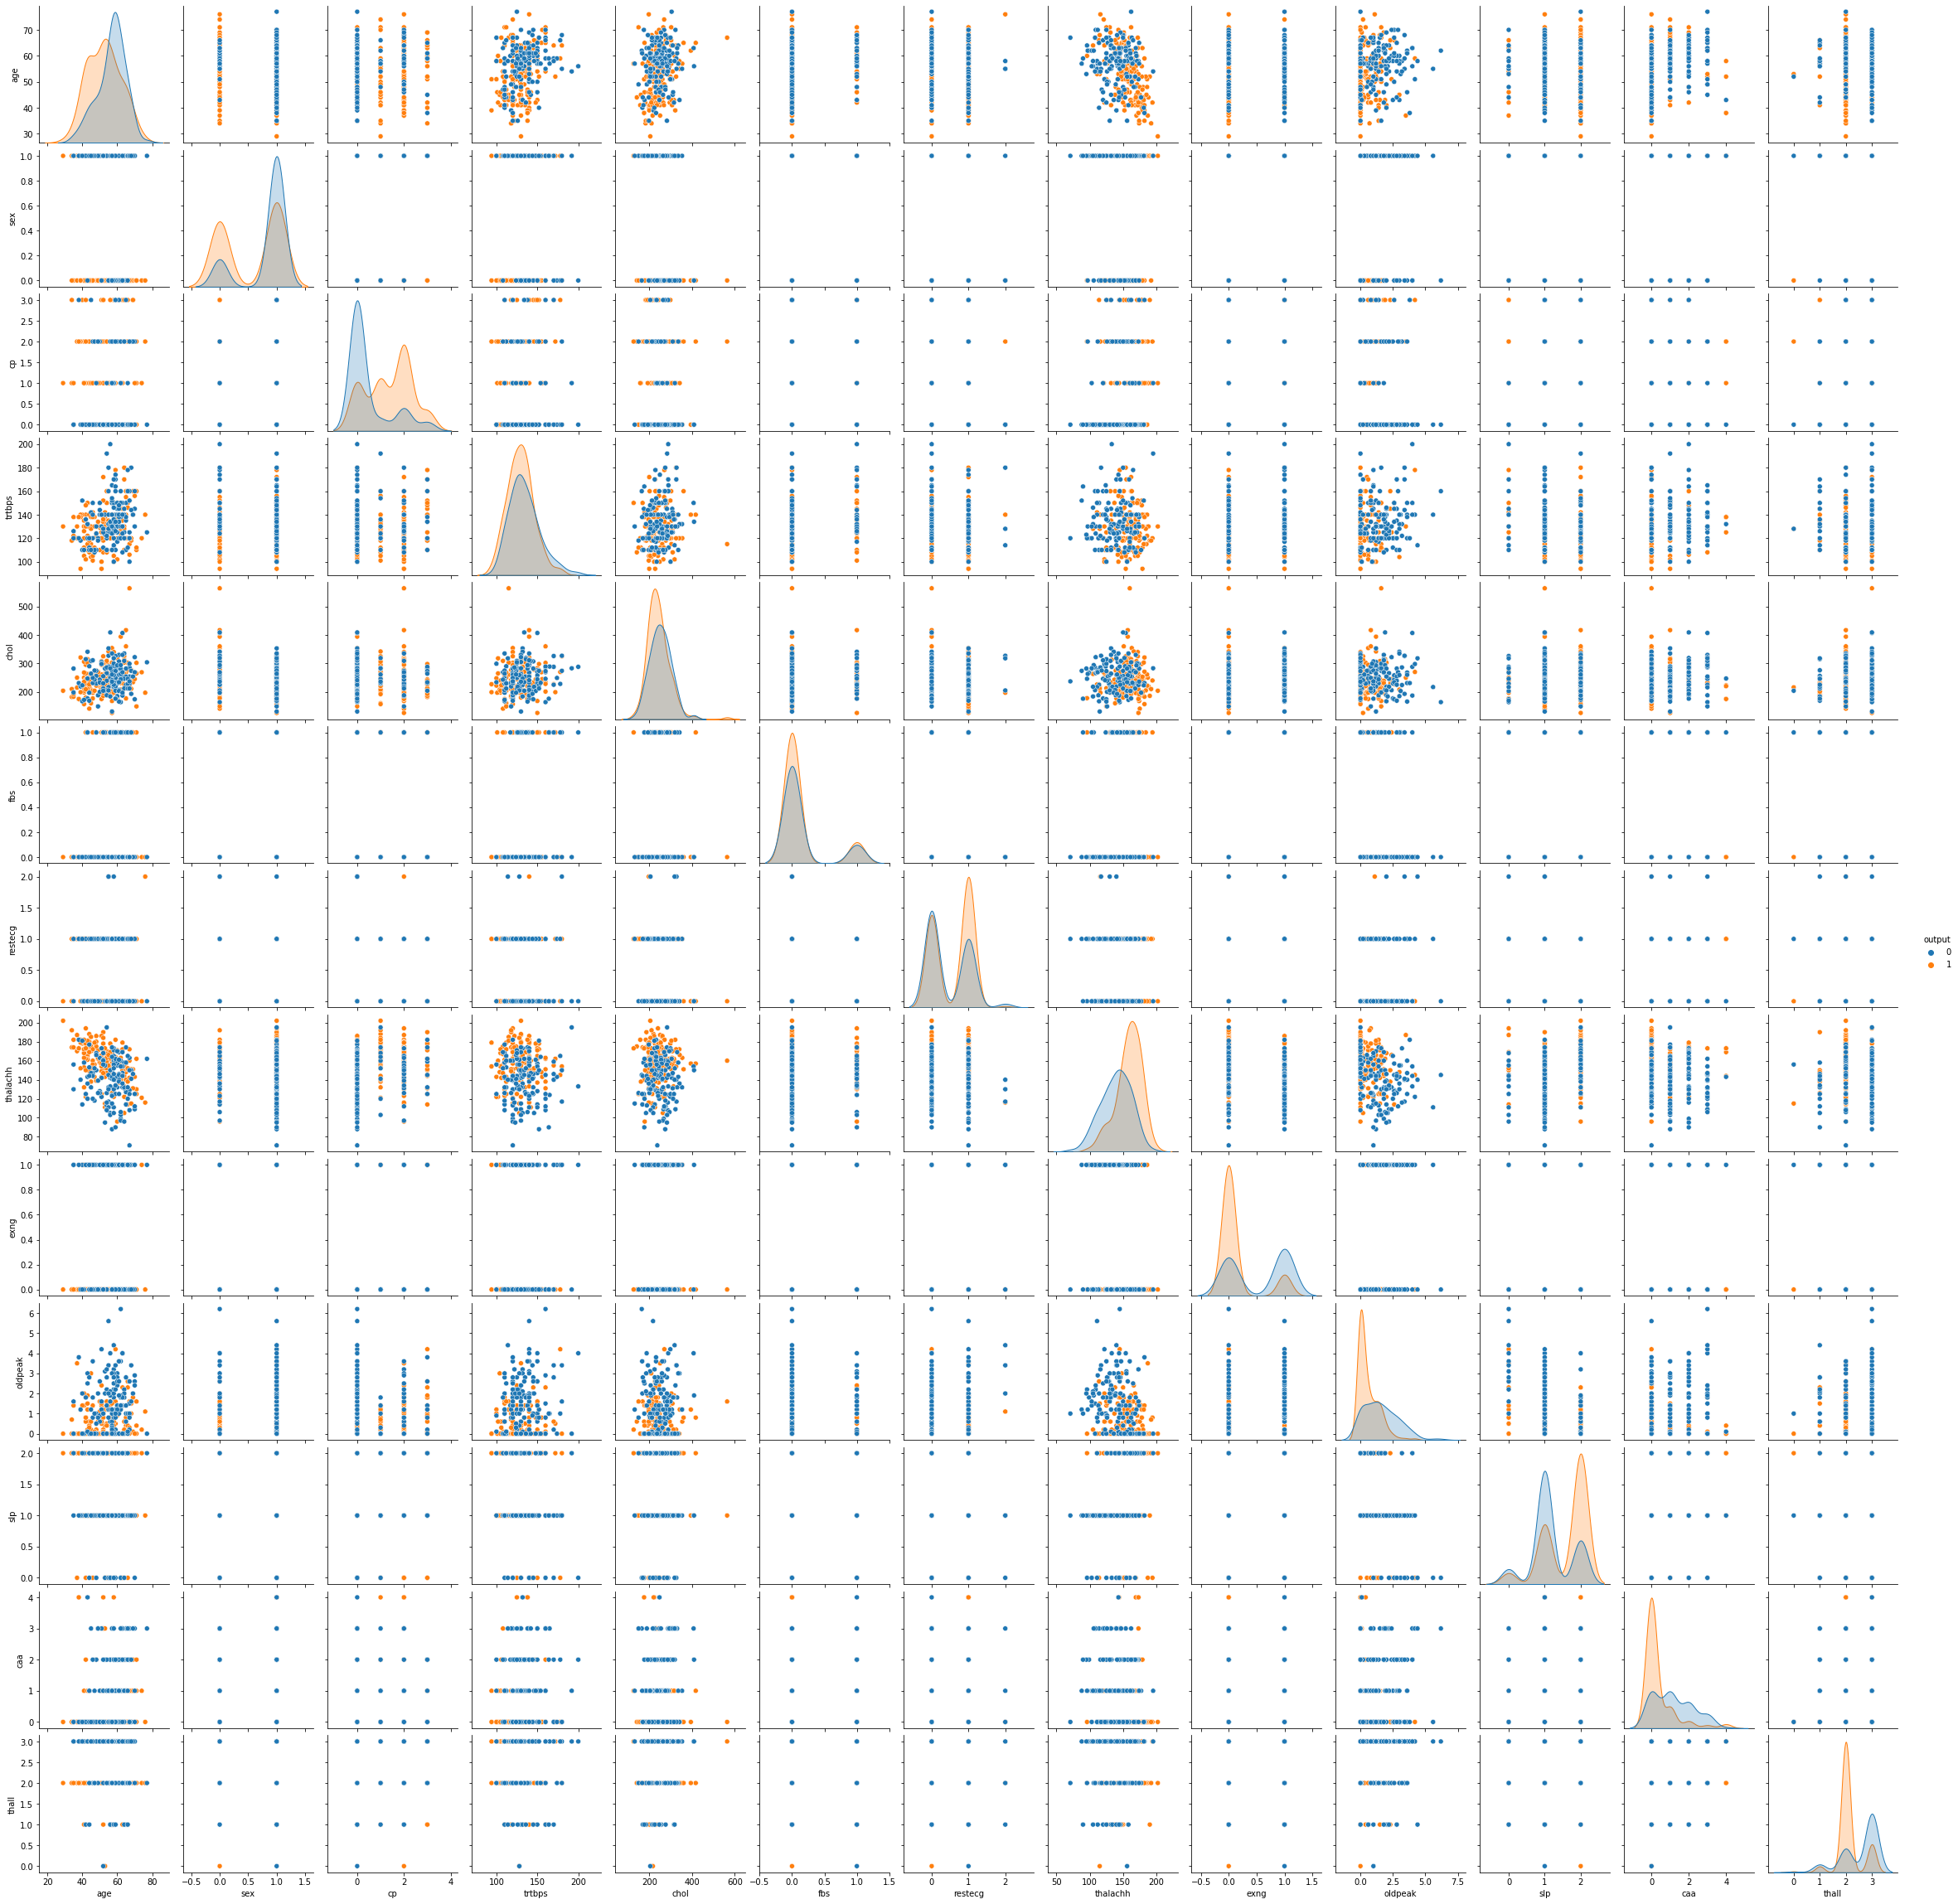

In [13]:
import seaborn as sns
sns.pairplot(dataset,hue='output')
plt.show()

In [14]:
#Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve

In [15]:
X = dataset.drop('output', axis=1)
y = dataset.output

In [16]:
#Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_feature = ['sex','exng','caa','cp','fbs','restecg','slp','thall']

one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot', one_hot, cat_feature)],
                                remainder='passthrough')
transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,63.0,145.0,233.0,150.0,2.3
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,37.0,130.0,250.0,187.0,3.5
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,41.0,130.0,204.0,172.0,1.4
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,56.0,120.0,236.0,178.0,0.8
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,57.0,120.0,354.0,163.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,57.0,140.0,241.0,123.0,0.2
299,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,45.0,110.0,264.0,132.0,1.2
300,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,68.0,144.0,193.0,141.0,3.4
301,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,57.0,130.0,131.0,115.0,1.2


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.3)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [20]:
model = {'LogisticRegression' : LogisticRegression(),
         'KNeighborsClassifier': KNeighborsClassifier(),
         
         'DecisionTreeClassifier': DecisionTreeClassifier(),
         'RandomForestClassifier' : RandomForestClassifier(),
         'Native_Bayes': GaussianNB()}

def model_fit_score(model, X_train, X_test, y_train, y_test):
  model_score = {}
  for name, model in model.items():
    model.fit(X_train, y_train) 
    y_pred_proba = model.predict_proba(X_test)
    y_pred = np.argmax(y_pred_proba,axis=1)
    model_score[name] = model.score(X_test, y_test)
  return model_score  

In [21]:
model_fit_score(model, X_train, X_test, y_train, y_test)

{'LogisticRegression': 0.8241758241758241,
 'KNeighborsClassifier': 0.8021978021978022,
 'DecisionTreeClassifier': 0.6373626373626373,
 'RandomForestClassifier': 0.8131868131868132,
 'Native_Bayes': 0.4725274725274725}

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
         "max_depth": [None, 5, 10, 20, 30],
         "max_features": ["auto", "sqrt"],
         "min_samples_split": [2,4,6],
         "min_samples_leaf": [1, 2, 4]}
np.random.seed(42)
clf = RandomForestClassifier(n_jobs=-1)
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions = grid,
                            n_iter=30,
                            cv = 5,
                            verbose = 2)
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   2.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimat

In [23]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None}

In [24]:
def evaluate_preds(y_true, y_preds):
  accuracy = accuracy_score(y_true, y_preds)
  precision = precision_score(y_true, y_preds)
  recall = recall_score(y_true, y_preds)
  f1 = f1_score(y_true, y_preds)
  print(f"Acc : {round(accuracy, 2) * 100:.2f}%")
  print(f"Precision : {round(precision, 2):.2f}")
  print(f"recall : {round(recall, 2):.2f}")
  print(f"F1 score {round(f1, 2):.2f}")

   

In [25]:
evaluate_preds(y_test, rs_clf.predict(X_test))

Acc : 84.00%
Precision : 0.81
recall : 0.90
F1 score 0.85


In [26]:
from sklearn.metrics import  roc_curve

# Make prediction with probability 
y_probs = rs_clf.predict_proba(X_test)

y_probs_positive = y_probs[:, 1] #axis = 1

fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02380952, 0.02380952, 0.02380952, 0.02380952,
       0.04761905, 0.04761905, 0.07142857, 0.0952381 , 0.11904762,
       0.14285714, 0.14285714, 0.14285714, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.19047619, 0.21428571, 0.21428571,
       0.35714286, 0.35714286, 0.4047619 , 0.4047619 , 0.45238095,
       0.47619048, 0.5       , 0.64285714, 0.69047619, 0.69047619,
       0.73809524, 0.76190476, 0.76190476, 0.95238095, 1.        ])

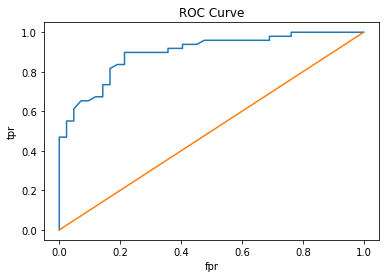

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0,1], [0,1])
ax.set(title="ROC Curve",
        xlabel="fpr",
        ylabel="tpr",)
plt.show()